In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

#### Read and pre-process data

In [2]:
# fetch data 

housing_data = pd.read_csv('house_price_subset.csv')

housing_data.head()

,LotArea,OverallQual,OverallCond,GrLivArea,FullBath,BedroomAbvGr,GarageCars,SaleCondition,SalePrice
0,8450,7,5,1710,2,3,2,Normal,208500
1,9600,6,8,1262,2,3,2,Normal,181500
2,11250,7,5,1786,2,3,2,Normal,223500
3,9550,7,5,1717,1,3,3,Abnorml,140000
4,14260,8,5,2198,2,4,3,Normal,250000


In [3]:
# subset data to only include columns for Normal Sale Condition

len(housing_data)

subset_data = housing_data[housing_data['SaleCondition'] == 'Normal'].drop(columns = ['SaleCondition'])

subset_data.head()

len(subset_data)

1460

,LotArea,OverallQual,OverallCond,GrLivArea,FullBath,BedroomAbvGr,GarageCars,SalePrice
0,8450,7,5,1710,2,3,2,208500
1,9600,6,8,1262,2,3,2,181500
2,11250,7,5,1786,2,3,2,223500
4,14260,8,5,2198,2,4,3,250000
5,14115,5,5,1362,1,1,2,143000


1198

In [4]:
subset_data.isna().sum()

LotArea         0
OverallQual     0
OverallCond     0
GrLivArea       0
FullBath        0
BedroomAbvGr    0
GarageCars      0
SalePrice       0
dtype: int64

In [5]:
subset_data.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea', 'FullBath',
       'BedroomAbvGr', 'GarageCars', 'SalePrice'],
      dtype='object')

Text(0.5, 0, 'LotArea')

Text(0, 0.5, 'SalePrice')

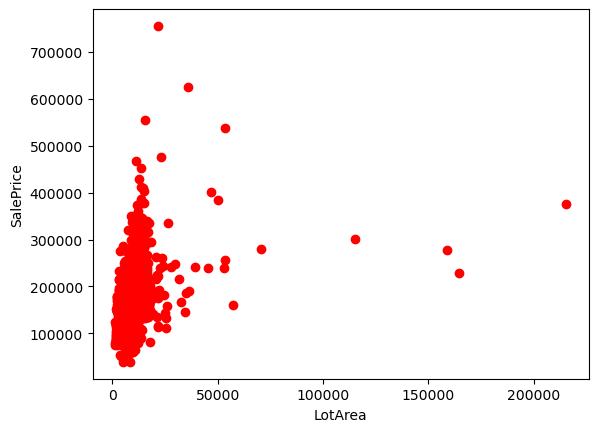

Text(0.5, 0, 'OverallQual')

Text(0, 0.5, 'SalePrice')

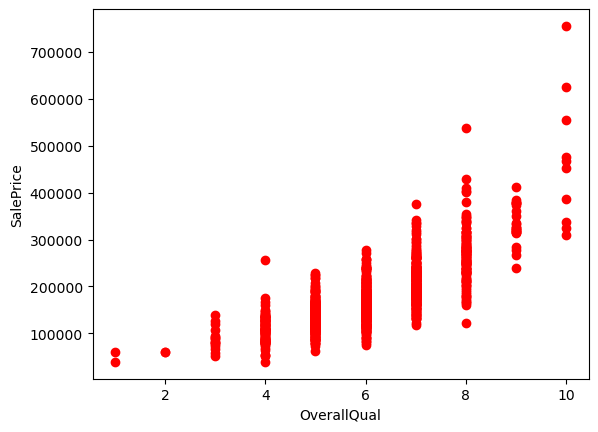

Text(0.5, 0, 'OverallCond')

Text(0, 0.5, 'SalePrice')

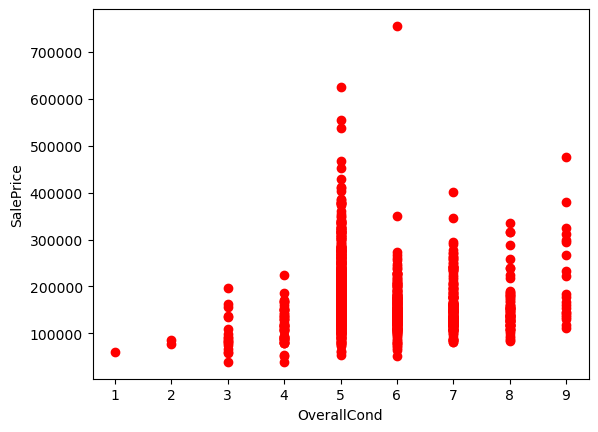

Text(0.5, 0, 'GrLivArea')

Text(0, 0.5, 'SalePrice')

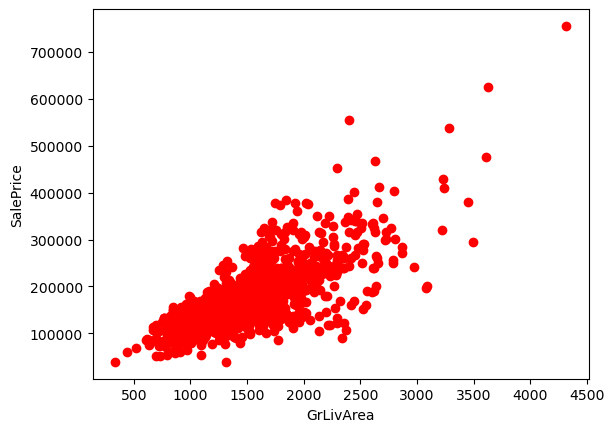

Text(0.5, 0, 'FullBath')

Text(0, 0.5, 'SalePrice')

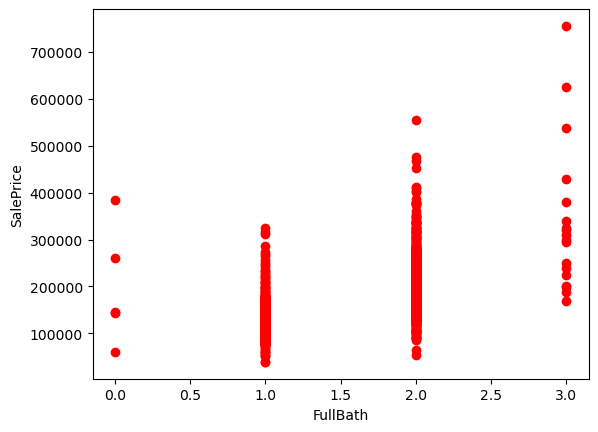

Text(0.5, 0, 'BedroomAbvGr')

Text(0, 0.5, 'SalePrice')

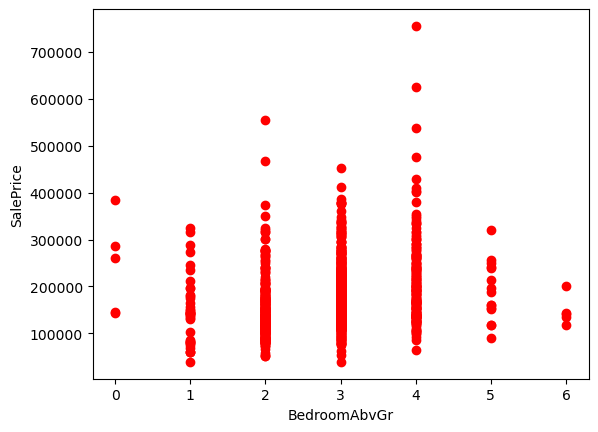

Text(0.5, 0, 'GarageCars')

Text(0, 0.5, 'SalePrice')

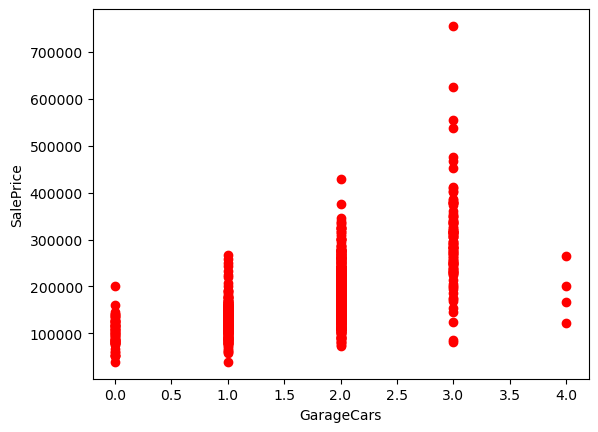

In [6]:
#plotting salesprice as x axis with all other categories
for col in subset_data.drop(columns = ['SalePrice']).columns:
    plt.scatter(subset_data[col], subset_data['SalePrice'], color = 'red', marker = 'o')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()
    
#

In [15]:
# adding non-linear columns
if True: 
    subset_data['LogLotArea'] = np.log(subset_data['LotArea'])
    subset_data['LotoverLiv'] = subset_data['LotArea']*subset_data['GrLivArea']
    subset_data['OvQualSq'] = subset_data['OverallQual']**2
    subset_data['OvCondsq'] = subset_data['OverallCond']**2
    subset_data['OvCondcu'] = subset_data['OverallCond']**3
    subset_data['BedAbGndsq'] = subset_data['BedroomAbvGr']**2
    subset_data['GarageCarsSq'] = subset_data['GarageCars']**2
    

In [8]:
# X_train, X_test, y_train, y_test = train_test_split(subset_data.drop(columns = ['SalePrice']), subset_data['SalePrice'], test_size=0.25)
X_train, X_test, y_train, y_test = train_test_split(subset_data.drop(columns = ['SalePrice']), subset_data['SalePrice'], test_size=0.25, random_state=35)
# Pick a random_state as below and keep using the same number (example 35) to repeat the same test and train data
# X_train, X_test, y_train, y_test = train_test_split(subset_data['bmi'], subset_data['charges'], test_size=0.25, random_state=35)
X_train
X_test
y_train
y_test

,LotArea,OverallQual,OverallCond,GrLivArea,FullBath,BedroomAbvGr,GarageCars,LogLotArea,LotoverLiv,OvQualSq,OvCondsq,OvCondcu,BedAbGndsq,GarageCarsSq
574,10500,5,7,1109,1,3,1,9.26,11644500,25,49,343,9,1
662,13560,6,3,1392,1,2,2,9.51,18875520,36,9,27,4,4
97,10921,4,5,960,1,3,1,9.30,10484160,16,25,125,9,1
191,7472,7,9,1479,1,4,2,8.92,11051088,49,81,729,16,4
769,53504,8,5,3279,3,4,3,10.89,175439616,64,25,125,16,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,9286,5,7,1268,1,3,1,9.14,11774648,25,49,343,9,1
1176,6951,5,5,923,1,3,1,8.85,6415773,25,25,125,9,1
1231,7728,5,6,1190,1,3,2,8.95,9196320,25,36,216,9,4
1295,8400,5,5,1052,1,3,1,9.04,8836800,25,25,125,9,1


,LotArea,OverallQual,OverallCond,GrLivArea,FullBath,BedroomAbvGr,GarageCars,LogLotArea,LotoverLiv,OvQualSq,OvCondsq,OvCondcu,BedAbGndsq,GarageCarsSq
1350,11643,5,5,2634,2,6,4,9.36,30667662,25,25,125,36,16
1438,7407,6,7,1236,1,2,2,8.91,9155052,36,49,343,4,4
975,2651,7,5,1382,2,3,2,7.88,3663682,49,25,125,9,4
163,5500,4,6,882,1,1,0,8.61,4851000,16,36,216,1,0
1225,10482,6,8,1138,1,3,1,9.26,11928516,36,64,512,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,7388,5,6,1327,1,3,2,8.91,9803876,25,36,216,9,4
582,11841,6,5,816,1,3,0,9.38,9662256,36,25,125,9,0
1390,9100,7,5,1525,2,3,2,9.12,13877500,49,25,125,9,4
94,9337,6,5,1786,2,3,2,9.14,16675882,36,25,125,9,4


574     139000
662     110000
97       94750
191     184000
769     538000
         ...  
911     143500
1176    119500
1231    132500
1295    138500
1168    235000
Name: SalePrice, Length: 898, dtype: int64

1350    200000
1438    149700
975     165000
163     103200
1225    145000
         ...  
132     150750
582     118500
1390    235000
94      204750
777     142500
Name: SalePrice, Length: 300, dtype: int64

In [9]:
model = LinearRegression(fit_intercept = True)

model.fit(X_train, y_train) 

# The following gives the R-square score
model.score(X_train, y_train) 

# This is the coefficient Beta_1, ..., Beta_7 -- added extra 7 Beta.. which eventually effects the mean error.
model.coef_

# This is the coefficient Beta_0
model.intercept_

LinearRegression()

0.8712036644878031

array([-4.19831640e+00, -2.88512798e+04,  5.25008119e+04,  3.14867362e+01,
        2.99498760e+03, -5.52299237e+03,  9.28703198e+03,  2.90449476e+04,
        2.17251204e-03,  4.24644263e+03, -5.96295654e+03,  2.03553148e+02,
       -8.04751282e+02,  2.04636132e+03])

-260249.22431068667

In [10]:
test_output = pd.DataFrame(model.predict(X_test), index = X_test.index, columns = ['pred_SalePrice'])
# When extending to multiple features remove .array.reshape(-1, 1)
test_output.head()

,pred_SalePrice
1350,"226,913.72"
1438,"166,649.95"
975,"162,976.25"
163,"98,631.02"
1225,"139,249.29"


In [11]:
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_SalePrice'] - test_output['SalePrice']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)

,pred_SalePrice,SalePrice
1350,"226,913.72",200000
1438,"166,649.95",149700
975,"162,976.25",165000
163,"98,631.02",103200
1225,"139,249.29",145000


Mean absolute error is 
21014.457539750118


In [12]:
abs(test_output['pred_SalePrice'] - test_output['SalePrice']).mean()/test_output['SalePrice'].mean()
model.score(X_test, y_test)

0.12455184059507454

0.8132074683002241

#### Visualize data

In [13]:
# define function to import viz libraries
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns

In [18]:
if False: 
    cols = X_train.columns
    for col in cols:
        plot_data = []
        plot_data.append(go.Scatter(x= X_train[col], y= y_train, name = 'Train data actual', mode = 'markers'))
        plot_data.append(go.Scatter(x= X_train[col], y= model.predict(X_train), name = 'Train data predicted', mode = 'markers'))
        layout = go.Layout(xaxis = dict(title=col), yaxis = dict(title= 'SalePrice'), 
                           title = 'Plot of predicted and actual')
        fig = go.Figure(data= plot_data, layout=layout)
        plotly.offline.iplot(fig)

        plot_data = []
        plot_data.append(go.Scatter(x= X_test[col], y= y_test, name = 'Test data actual', mode = 'markers'))
        plot_data.append(go.Scatter(x= X_test[col], y= model.predict(X_test), name = 'Test data predicted', mode = 'markers'))

        layout = go.Layout(xaxis = dict(title=col), yaxis = dict(title= 'SalePrice'), 
                           title = 'Plot of predicted and actual')
        fig = go.Figure(data= plot_data, layout=layout)
        plotly.offline.iplot(fig)
